In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [200]:
vuelos = pd.read_excel("C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/5/VUELOS.xlsx")
vuelos.head()

,MES,Vuelos
0,1995M01,53180
1,1995M02,48647
2,1995M03,55353
3,1995M04,56751
4,1995M05,59487


In [201]:
vuelos['MES'] = pd.to_datetime(vuelos['MES'], format = '%YM%m')
vuelos.index = vuelos['MES']
del vuelos['MES']
print(vuelos.head())

            Vuelos
MES               
1995-01-01   53180
1995-02-01   48647
1995-03-01   55353
1995-04-01   56751
1995-05-01   59487


(array([ 8766.,  9496., 10227., 10957., 11688., 12418., 13149., 13879.,
        14610., 15340., 16071.]),
 [Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996'),
  Text(10227.0, 0, '1998'),
  Text(10957.0, 0, '2000'),
  Text(11688.0, 0, '2002'),
  Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014')])

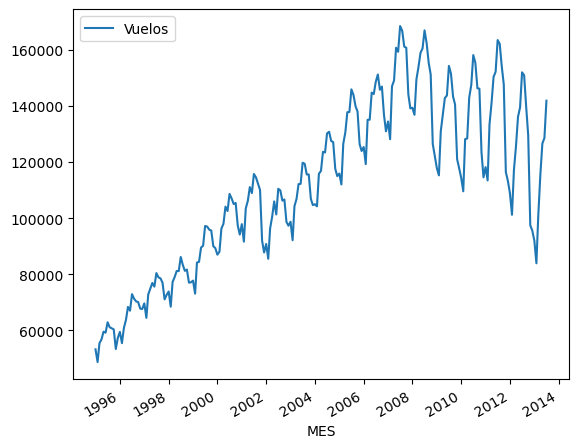

In [202]:
sns.lineplot(vuelos)
plt.xticks(rotation=30, ha='right')

Estacionariedad: Si la media y la varianza de la serie permanecen constantes a lo largo del tiempo.
Tendencia: Si existe un incremento o decremento sostenido en los datos.
Comportamiento estacional: Si hay patrones recurrentes en intervalos regulares.

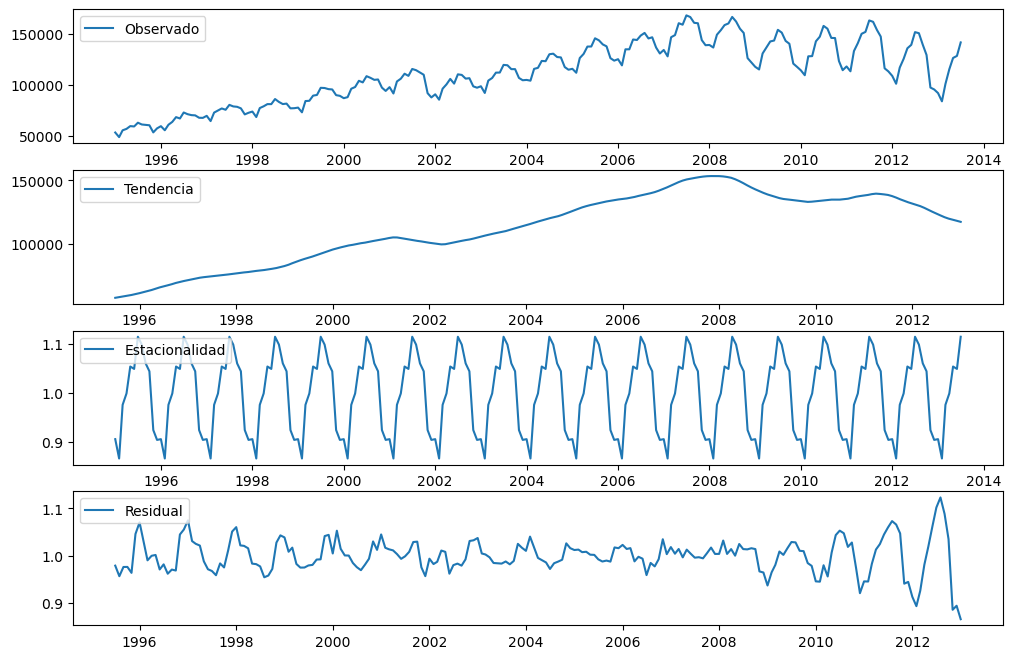

In [203]:
#Descompondremos la serie temporal para conocer su estacionalidad, tendencia y residuos:
from statsmodels.tsa.seasonal import seasonal_decompose
# Realizar la descomposición estacional
result = seasonal_decompose(vuelos, model='multiplicative', period=12)

# Visualizar las componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.show()

Estacionariedad: La serie no es estacionaria, ya que muestra una tendencia y estacionalidad claras.
Tendencia: Hay un incremento inicial en el número de vuelos, aunque parece estabilizarse en los años recientes.
Estacionalidad: Existe un comportamiento estacional bien definido con un periodo anual (12 meses).

In [204]:
print(result.seasonal, '\n', result.seasonal.idxmax(),  result.seasonal.max(), 
      '\n', result.seasonal.idxmin(), result.seasonal.min())

MES
1995-01-01    0.906183
1995-02-01    0.866777
1995-03-01    0.976114
1995-04-01    0.999328
1995-05-01    1.054177
                ...   
2013-03-01    0.976114
2013-04-01    0.999328
2013-05-01    1.054177
2013-06-01    1.049321
2013-07-01    1.114847
Name: seasonal, Length: 223, dtype: float64 
 1995-07-01 00:00:00 1.1148466437506472 
 1995-02-01 00:00:00 0.8667772408108932


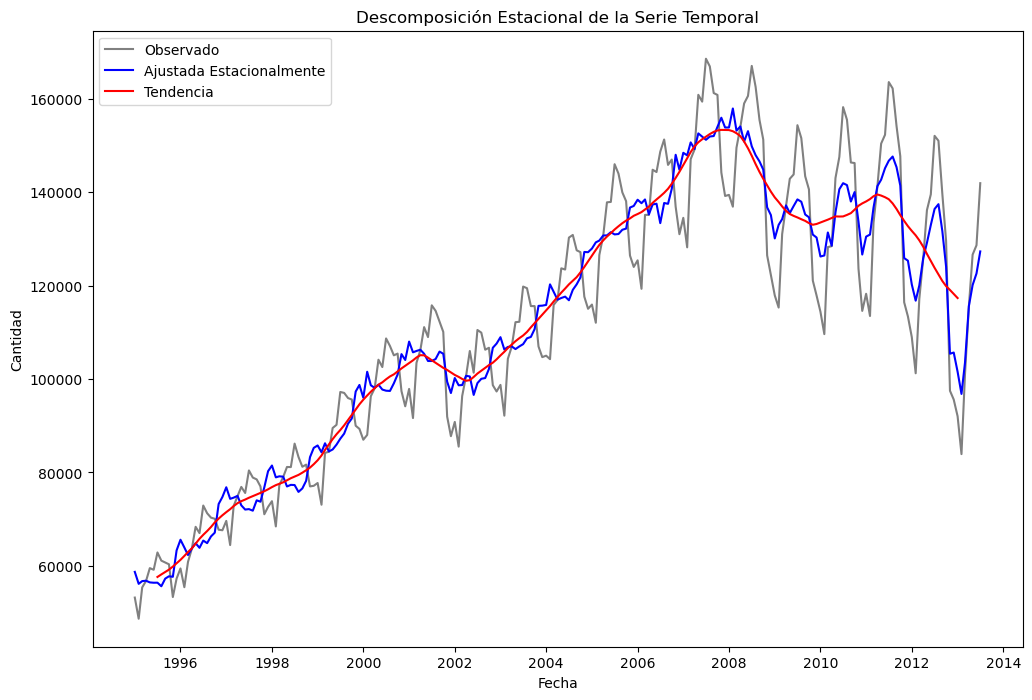

In [205]:
# Crear un gráfico que muestre las componentes
plt.figure(figsize=(12, 8))
plt.plot(result.observed, label='Observado', color='grey')
plt.plot(result.observed/result.seasonal,
label='Ajustada Estacionalmente', color='blue')
plt.plot(result.trend, label='Tendencia', color='red')

# Añadir leyendas y título
plt.legend()
plt.title('Descomposición Estacional de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

5. Representar las series de cada año ¿En qué año hubo más vuelos?

In [206]:
vuelos.head()

,Vuelos
MES,
1995-01-01,53180
1995-02-01,48647
1995-03-01,55353
1995-04-01,56751
1995-05-01,59487


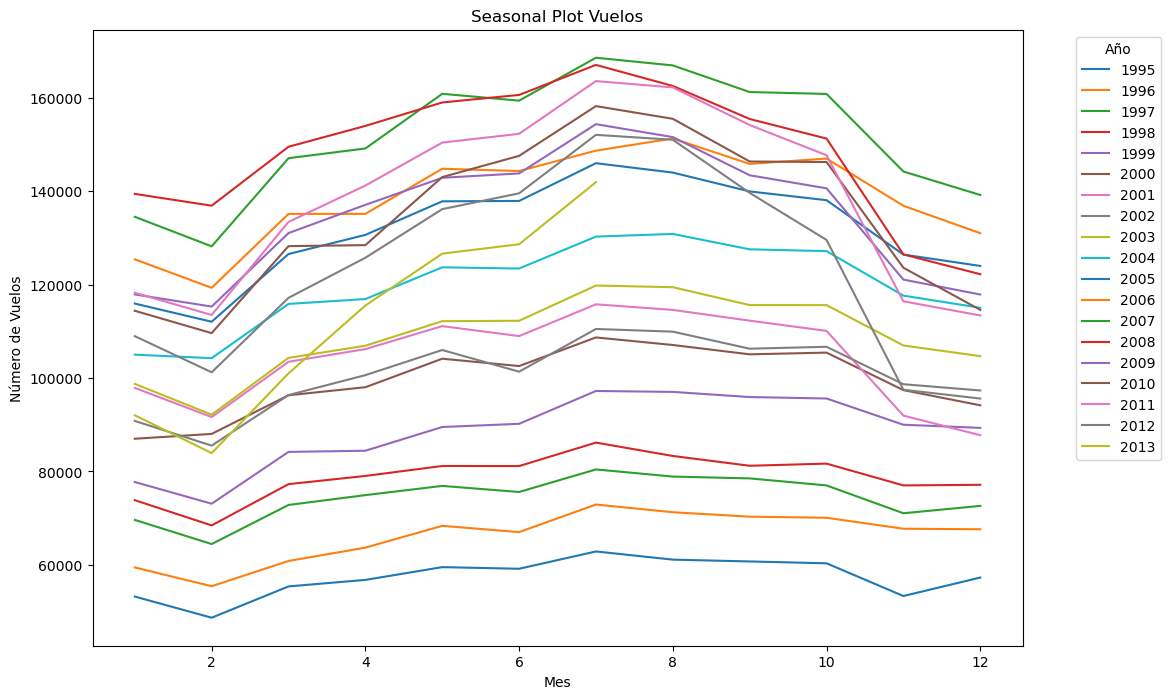

In [207]:
# Agregar columna 'Año' a partir del índice
vuelos['Año'] = pd.to_datetime(vuelos.index, format='%YM%m').year

# Crear la figura
plt.figure(figsize=(12, 8))

# Graficar cada año con un color diferente
for Año, datos_año in vuelos.groupby('Año'):
    plt.plot(datos_año.index.month, datos_año['Vuelos'], label=str(Año))

# Añadir leyenda y título
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Seasonal Plot Vuelos')
plt.xlabel('Mes')
plt.ylabel('Número de Vuelos')

# Mostrar el gráfico
plt.show()


In [208]:
vuelos_por_año = vuelos.groupby('Año')['Vuelos'].sum()
año_max_vuelos = vuelos_por_año.idxmax()
max_vuelos = vuelos_por_año.max()

print(f"El año con más vuelos fue {año_max_vuelos}, con un total de {max_vuelos} vuelos.")

El año con más vuelos fue 2007, con un total de 1820700 vuelos.


In [209]:
vuelos_tr = vuelos.iloc[:-7]

# MODELO DE ALISADO SIMPLE
import statsmodels.api as sm
vuelos_r = vuelos_tr.Vuelos.loc[:]
vuelos_r.index.freq = 'MS'
# Aplicar suavizado exponencial simple.
modelo_ses = sm.tsa.SimpleExpSmoothing(vuelos_r , initialization_method="estimated").fit()
# Para seleccionar distintas alphas, fit(smoothing_level=alpha)
# Calcular la predicción para 7 días.
vuelos_s1 = modelo_ses.forecast(steps=7)
# Para ver parámetros, e.g.: alpha = 0.995
modelo_ses.summary()

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Vuelos,No. Observations:,216
Model:,SimpleExpSmoothing,SSE,12050682886.788
Optimized:,True,AIC,3856.815
Trend:,None,BIC,3863.566
Seasonal:,None,AICC,3857.005
Seasonal Periods:,None,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,11:23:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,51244.400,l.0,True


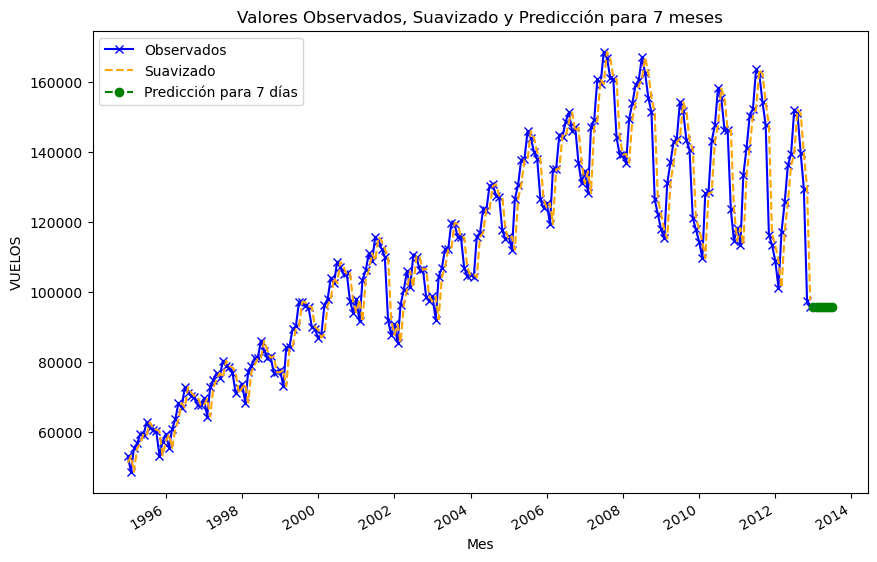

In [210]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
# Valores observados
plt.plot(vuelos_r.index, vuelos_r, label='Observados', marker='x', linestyle='-', color='blue')
# Valores suavizados (fitted)
plt.plot(vuelos_r.index, modelo_ses.fittedvalues, label='Suavizado', linestyle='--', color='orange')
# Predicción para 7 días
plt.plot(vuelos_s1.index, vuelos_s1, label='Predicción para 7 días', linestyle='--', marker='o', color='green')
plt.xlabel('Mes')
plt.ylabel('VUELOS')
plt.title('Valores Observados, Suavizado y Predicción para 7 meses')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

In [211]:
# MODELO DE ALISADO DOBLE
# Aplicar suavizado exponencial doble (Holt).
modelo_holt = sm.tsa.ExponentialSmoothing(vuelos_r, trend='add', damped=False).fit()
# Para seleccionar distintas alphas y betas, fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
# Obtener predicciones para 7 meses
predicciones = modelo_holt.forecast(steps=7)
# Mostrar la descripción del modelo
modelo_holt.summary()

C:\Users\lrodr\AppData\Local\Temp\ipykernel_19660\3288022810.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(vuelos_r, trend='add', damped=False).fit()
c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Vuelos,No. Observations:,216
Model:,ExponentialSmoothing,SSE,12248854050.067
Optimized:,True,AIC,3864.339
Trend:,Additive,BIC,3877.840
Seasonal:,None,AICC,3864.741
Seasonal Periods:,None,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,11:23:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0236905,beta,True


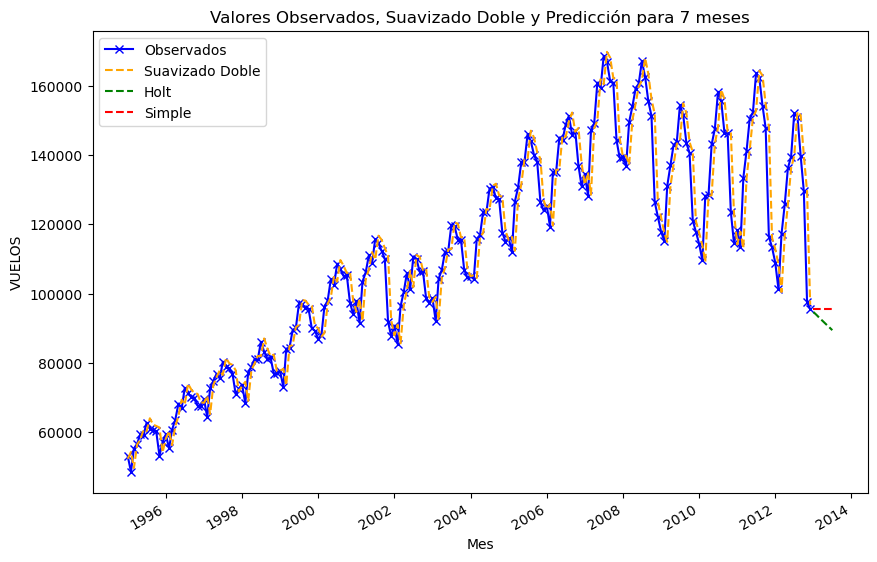

In [212]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
# Valores observados
plt.plot(vuelos_r.index, vuelos_r, label='Observados', marker='x', linestyle='-', color='blue')
# Valores suavizados (fitted)
plt.plot(vuelos_r.index, modelo_holt.fittedvalues, label='Suavizado Doble', linestyle='--', color='orange')
# Predicción para 7 días
plt.plot(predicciones.index, predicciones, label='Holt', linestyle='--',color='green')
plt.plot(vuelos_s1.index, vuelos_s1, label='Simple', linestyle='--', color='red')
plt.xlabel('Mes')
plt.ylabel('VUELOS')
plt.title('Valores Observados, Suavizado Doble y Predicción para 7 meses')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

In [213]:
# MODELO DE ALISADO HOLT-WINTERS
modelo_holt_winters = sm.tsa.ExponentialSmoothing(vuelos_tr['Vuelos'], trend='add', seasonal='multiplicative', seasonal_periods=12).fit()
# Obtener predicciones para 1 año
predicciones_hw = modelo_holt_winters.forecast(steps=12)
# Mostrar la descripción del modelo
modelo_holt_winters.summary()

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Vuelos,No. Observations:,216
Model:,ExponentialSmoothing,SSE,2352380056.879
Optimized:,True,AIC,3531.938
Trend:,Additive,BIC,3585.942
Seasonal:,Multiplicative,AICC,3535.410
Seasonal Periods:,12,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,11:23:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6060714,alpha,True
smoothing_trend,0.0275487,beta,True


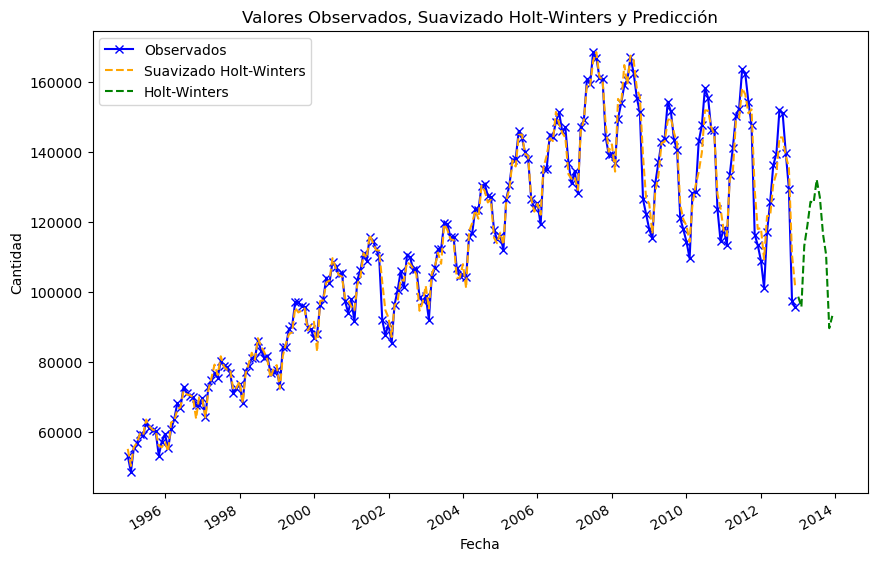

In [214]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
plt.plot(vuelos_tr.index, vuelos_tr['Vuelos'], label='Observados', marker='x', linestyle='-', color='blue')
plt.plot(vuelos_tr.index, modelo_holt_winters.fittedvalues, label='Suavizado Holt-Winters', linestyle='--', color='orange')
plt.plot(predicciones_hw.index, predicciones_hw, label='Holt-Winters', linestyle='--',color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Valores Observados, Suavizado Holt-Winters y Predicción')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\lrodr\AppData\Local\Temp\ipykernel_19660\2602418103.py:9: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(vuelos_r, trend='add', damped=False).fit()
c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\lrodr\AppData\Local\Temp\ipykernel_19660\2602418103.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(vuelos_tr.index[-1], periods=12, freq='M'), prediccio

SES: AIC=3856.82
HOLT: AIC=3864.34
HOLT_WINTERS: AIC=3531.94
El mejor modelo es: HOLT_WINTERS


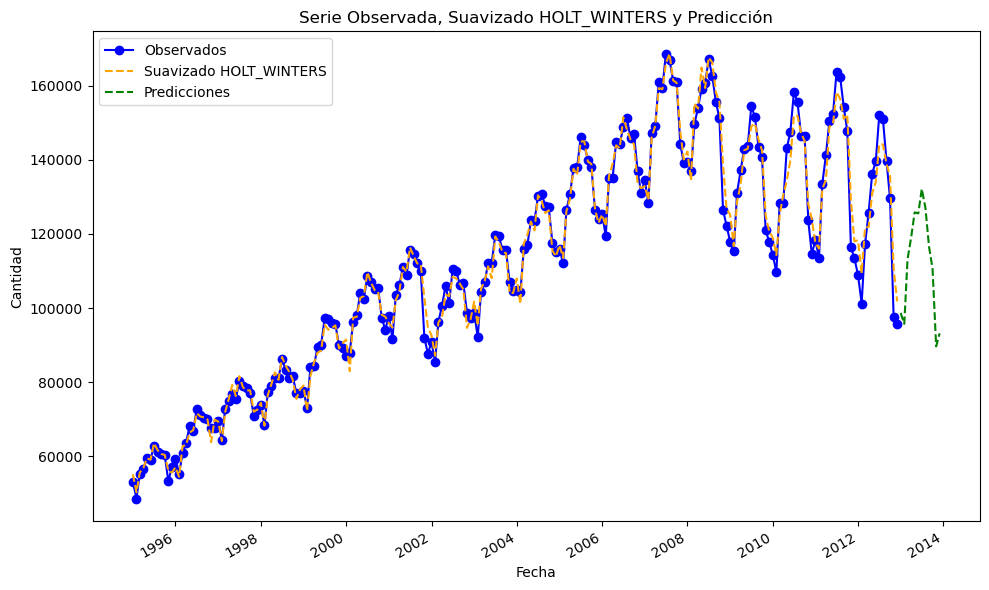

                Fecha     Predicción
2013-01-01 2012-12-31   98698.855686
2013-02-01 2013-01-31   95776.989517
2013-03-01 2013-02-28  113191.898748
2013-04-01 2013-03-31  119117.368262
2013-05-01 2013-04-30  125820.258639
2013-06-01 2013-05-31  125547.305302
2013-07-01 2013-06-30  132139.124796
2013-08-01 2013-07-31  127072.992721
2013-09-01 2013-08-31  116547.671881
2013-10-01 2013-09-30  110710.055784
2013-11-01 2013-10-31   89692.349551
2013-12-01 2013-11-30   93208.241443


C:\Users\lrodr\AppData\Local\Temp\ipykernel_19660\2602418103.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tabla_predicciones = pd.DataFrame({'Fecha': pd.date_range(vuelos_tr.index[-1], periods=12, freq='M'),


In [215]:
# Evaluar modelos de suavizado exponencial
resultados = {}

#Modelo alisado simple (AS)
modelo_ses = sm.tsa.SimpleExpSmoothing(vuelos_r , initialization_method="estimated").fit()
resultados['SES'] = modelo_ses

#Modelo alisado doble Holt (AD)
modelo_holt = sm.tsa.ExponentialSmoothing(vuelos_r, trend='add', damped=False).fit()
resultados['HOLT'] = modelo_holt

#Modelo alisado Holt-Winters (HW)
modelo_holt_winters = sm.tsa.ExponentialSmoothing(vuelos_tr['Vuelos'], trend='add', seasonal='multiplicative', seasonal_periods=12).fit()
resultados['HOLT_WINTERS'] = modelo_holt_winters

# Comparar los modelos basados en AIC
for nombre, modelo in resultados.items():
    print(f"{nombre}: AIC={modelo.aic:.2f}")

# Seleccionar el mejor modelo
mejor_modelo = min(resultados, key=lambda x: resultados[x].aic)
modelo_final = resultados[mejor_modelo]
print(f"El mejor modelo es: {mejor_modelo}")

# Predicciones para el próximo año
predicciones = modelo_final.forecast(steps=12)

# Graficar la serie observada, suavizada y predicciones
plt.figure(figsize=(10, 6))
plt.plot(vuelos_tr.index, vuelos_tr['Vuelos'], label='Observados', marker='o', linestyle='-', color='blue')
plt.plot(vuelos_tr.index, modelo_final.fittedvalues, label=f'Suavizado {mejor_modelo}', linestyle='--', color='orange')
plt.plot(pd.date_range(vuelos_tr.index[-1], periods=12, freq='M'), predicciones, label='Predicciones', linestyle='--', color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title(f'Serie Observada, Suavizado {mejor_modelo} y Predicción')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Mostrar una tabla con las predicciones
tabla_predicciones = pd.DataFrame({'Fecha': pd.date_range(vuelos_tr.index[-1], periods=12, freq='M'), 
                                    'Predicción': predicciones})
print(tabla_predicciones)

El logaritmo se aplica para estabilizar la varianza, especialmente si los datos tienen una tendencia exponencial o cambios que aumentan o disminuyen de manera desproporcionada con el tiempo.
La diferenciación se usa para eliminar tendencias (hacer estacionaria la serie), lo cual es fundamental para muchos modelos de series temporales, ya que estos suponen que los datos son estacionarios.

In [216]:
vuelos_tr['Vuelos_log'] = np.log(vuelos_tr['Vuelos'])
vuelos_tr['Vuelos_log_diff'] = vuelos_tr['Vuelos_log'].diff().dropna()

C:\Users\lrodr\AppData\Local\Temp\ipykernel_19660\1371523053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos_tr['Vuelos_log'] = np.log(vuelos_tr['Vuelos'])
C:\Users\lrodr\AppData\Local\Temp\ipykernel_19660\1371523053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos_tr['Vuelos_log_diff'] = vuelos_tr['Vuelos_log'].diff().dropna()


In [217]:
# MODELO DE ALISADO HOLT-WINTERS
predicciones_hw = modelo_holt_winters.forecast(steps=7)

# MODELO DE ALISADO HOLT-WINTERS CON TRANSFORMACIONES
modelo_hw_tr = sm.tsa.ExponentialSmoothing(vuelos_tr['Vuelos_log_diff'], trend='add', seasonal='add', seasonal_periods=12).fit()
predicciones_hw_diff_log = modelo_hw_tr.forecast(steps=7)
predicciones_hw_tr = predicciones_hw_diff_log.cumsum() + vuelos_tr['Vuelos_log'].iloc[-1]

# Mostrar la descripción del modelo
modelo_hw_tr.summary()

c:\Users\lrodr\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Vuelos_log_diff,No. Observations:,216
Model:,ExponentialSmoothing,SSE,nan
Optimized:,True,AIC,nan
Trend:,Additive,BIC,nan
Seasonal:,Additive,AICC,nan
Seasonal Periods:,12,Date:,"Sat, 11 Jan 2025"
Box-Cox:,False,Time:,11:23:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


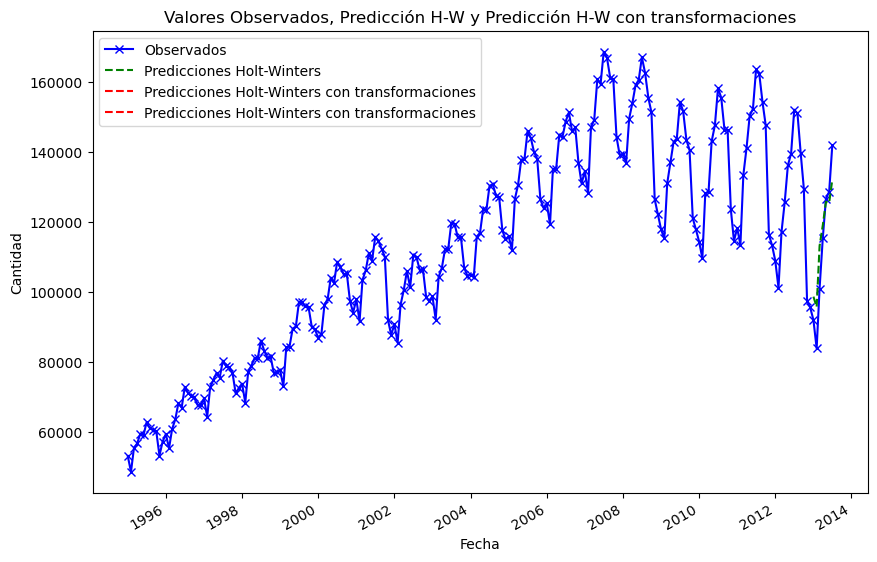

In [218]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))

plt.plot(vuelos.index, vuelos['Vuelos'], label='Observados', marker='x', linestyle='-', color='blue')

#Predicciones Holt-Winters
plt.plot(predicciones_hw.index, predicciones_hw, label='Predicciones Holt-Winters', linestyle='--',color='green')

# Predicciones Holt-Winters con transformaciones  (AHHHHHHHH)
plt.plot(predicciones_hw_tr.index, np.exp(predicciones_hw_tr.cumsum() + vuelos_tr['Vuelos_log'].iloc[-1]), label='Predicciones Holt-Winters con transformaciones', linestyle='--', color='red')
plt.plot(pd.date_range(start=vuelos_tr.index[-1], periods=7, freq='MS'), np.exp(predicciones_hw_tr.cumsum() + vuelos_tr['Vuelos_log'].iloc[-1]), label='Predicciones Holt-Winters con transformaciones', linestyle='--', color='red')

plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Valores Observados, Predicción H-W y Predicción H-W con transformaciones')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()